<a href="https://colab.research.google.com/github/Alif07xyz/HealthBite/blob/ML/Capstone_Project_Bahan_Makanan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
# from tensorflow.keras.applications import MobileNetV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime
import os

**PREPROCESSING IMAGE**

In [ ]:
height = 224
width = 224
channels = 3
img_shape = (height, width, channels)
img_size = (height, width)

In [ ]:
TRAINING_DIR = "/content/drive/MyDrive/Capstone/train"
VALIDATION_DIR = "/content/drive/MyDrive/Capstone/val"
TEST_DIR = "/content/drive/MyDrive/Capstone/test"

In [ ]:
training_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=20,
)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=img_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=123
)

labels = train_generator.class_indices
print(labels)

with open('food_label.txt', 'w') as f:
    for food_class in labels:
        f.write(f'{food_class}\n')

Found 4481 images belonging to 28 classes.
{'belimbing_wuluh': 0, 'beras': 1, 'beras_merah': 2, 'brokoli': 3, 'coklat': 4, 'cumi': 5, 'daging_ayam': 6, 'daging_kambing': 7, 'daging_sapi': 8, 'ikan': 9, 'jagung': 10, 'kacang_panjang': 11, 'kangkung': 12, 'kentang': 13, 'kol': 14, 'kol_ungu': 15, 'labu_siam': 16, 'nangka': 17, 'nasi': 18, 'pangsit': 19, 'sereal': 20, 'tahu': 21, 'tauge': 22, 'telur': 23, 'tepung': 24, 'terong': 25, 'udang': 26, 'wortel': 27}


In [ ]:
# train_generator = tf.keras.utils.image_dataset_from_directory(TRAINING_DIR,
#                                                        labels='inferred',
#                                                        color_mode='rgb',
#                                                        label_mode='categorical',
#                                                        shuffle=True,
#                                                        image_size=img_size,
#                                                        seed=123)

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                                   class_mode='categorical',
                                                                   color_mode='rgb',
                                                                   shuffle=False,
                                                                   target_size=img_size,
                                                                   seed=123)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                class_mode = 'categorical',
                                                target_size = img_size,
                                                shuffle = False)

Found 560 images belonging to 28 classes.
Found 560 images belonging to 28 classes.


In [ ]:
# labels = train_generator.class_indices
# for class_number, class_name in enumerate(labels):
#     print(f'Nomor: {class_number}, Kelas: {class_name}')

In [ ]:
for image_batch, labels_batch in train_generator:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32, 28)


**BUILD MODEL**

In [ ]:
# Callback EarlyStopping untuk menghentikan pelatihan jika val_loss tidak berkurang
early_stopping_callback = EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [ ]:
# Model menggunakan pre-trained MobileNetV3

base_model = MobileNetV2(input_shape=img_shape, include_top=False, weights='imagenet')

# Membuat model sederhana di atas pre-trained MobileNetV3
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(28, activation='softmax')
])


In [ ]:
# # Mengatur model untuk pelatihan
# model.compile(optimizer=Adam(learning_rate=0.0001),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Menampilkan ringkasan model
# model.summary()

# # Pelatihan model
# history = model.fit(
#     train_generator,
#     validation_data=validation_generator,
#     epochs=10,
#     batch_size=32,
#     callbacks=[early_stopping_callback]
# )

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Mengatur model untuk pelatihan
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Menampilkan ringkasan model
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 256)               327936    
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                      

**TRAINING MODEL**

In [ ]:
# Pelatihan model dengan menggunakan callbacks
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping_callback]
)

Epoch 1/20
141/141 [==============================] - 1106s 8s/step - loss: 2.2193 - accuracy: 0.4383 - val_loss: 1.0650 - val_accuracy: 0.6893
Epoch 2/20
141/141 [==============================] - 1071s 8s/step - loss: 0.8311 - accuracy: 0.7630 - val_loss: 0.6909 - val_accuracy: 0.7982
Epoch 3/20
141/141 [==============================] - 1098s 8s/step - loss: 0.5495 - accuracy: 0.8413 - val_loss: 0.5893 - val_accuracy: 0.8036
Epoch 4/20
141/141 [==============================] - 1064s 8s/step - loss: 0.4477 - accuracy: 0.8706 - val_loss: 0.4958 - val_accuracy: 0.8518
Epoch 5/20
141/141 [==============================] - 1078s 8s/step - loss: 0.3549 - accuracy: 0.8985 - val_loss: 0.4627 - val_accuracy: 0.8571
Epoch 6/20
141/141 [==============================] - 1073s 8s/step - loss: 0.3152 - accuracy: 0.9058 - val_loss: 0.3708 - val_accuracy: 0.8857
Epoch 7/20
141/141 [==============================] - 1085s 8s/step - loss: 0.2691 - accuracy: 0.9192 - val_loss: 0.3689 - val_accuracy:

**PLOTTING TRAINING AND VALIDATION**

Akurasi pelatihan: 0.9761214256286621
Loss pelatihan: 0.07224402576684952
Akurasi validasi: 0.8928571343421936
Loss validasi: 0.44461122155189514


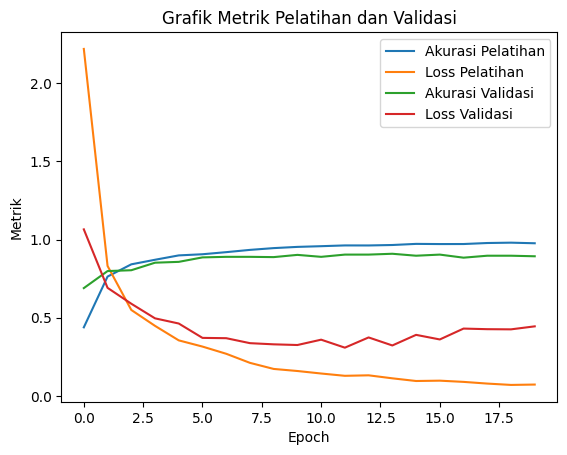

In [ ]:
import matplotlib.pyplot as plt

# Cetak metrik pelatihan dan validasi
print("Akurasi pelatihan:", history.history['accuracy'][-1])
print("Loss pelatihan:", history.history['loss'][-1])
print("Akurasi validasi:", history.history['val_accuracy'][-1])
print("Loss validasi:", history.history['val_loss'][-1])

# Plot grafik metrik pelatihan
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['loss'], label='Loss Pelatihan')

# Plot grafik metrik validasi
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.plot(history.history['val_loss'], label='Loss Validasi')

# Tambahkan label dan judul
plt.xlabel('Epoch')
plt.ylabel('Metrik')
plt.title('Grafik Metrik Pelatihan dan Validasi')
plt.legend()

# Tampilkan grafik
plt.show()

In [ ]:
model.evaluate(test_generator)

18/18 [==============================] - 159s 9s/step - loss: 0.4407 - accuracy: 0.8857


[0.44065433740615845, 0.8857142925262451]

**CONFUSION MATRIX**

18/18 [==============================] - 51s 3s/step


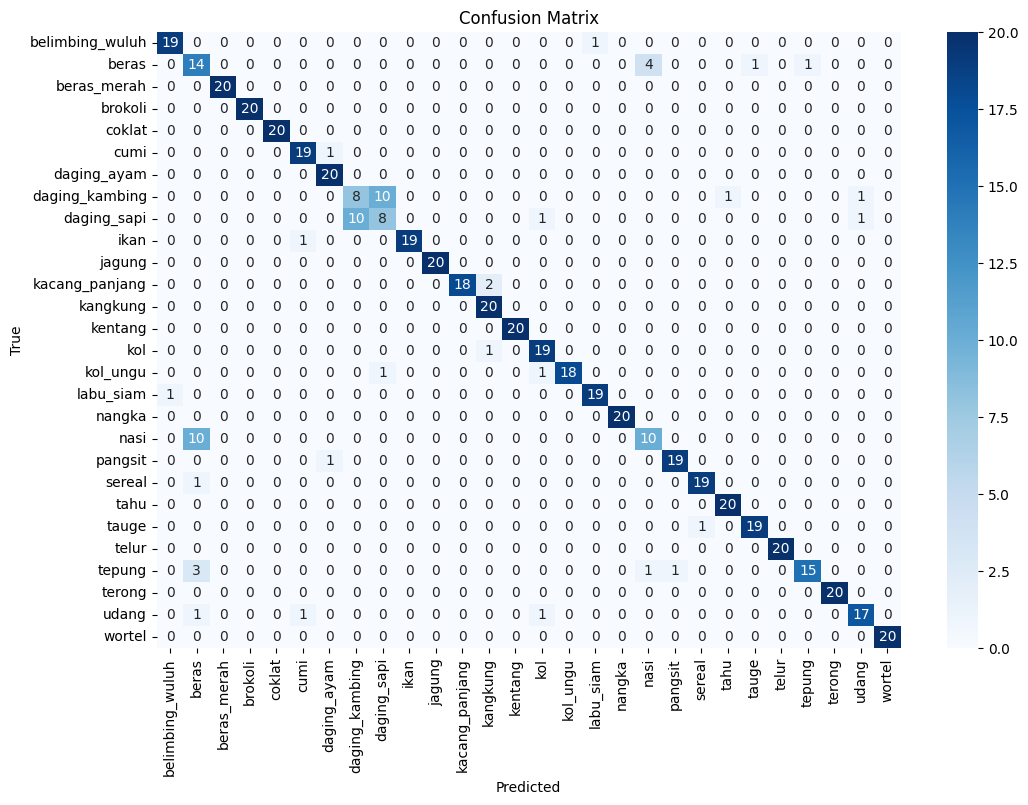

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi kelas dari data uji
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Ambil label yang sebenarnya
y_true = validation_generator.classes

# Dapatkan nama kelas
class_names = list(validation_generator.class_indices.keys())

# Hitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix menggunakan seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Mendapatkan prediksi dari model untuk data validasi
y_pred = model.predict(validation_generator)

# Mengubah hasil prediksi menjadi kelas yang benar-benar diprediksi (0 atau 1)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

# Menghitung precision, recall, dan f1-score
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Menampilkan classification report
print('Classification Report:')
print(classification_report(y_true, y_pred_classes))


18/18 [==============================] - 35s 2s/step
Precision: 0.8963069483123718
Recall: 0.8928571428571429
F1 Score: 0.8924358802127708
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.48      0.70      0.57        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       0.90      0.95      0.93        20
           6       0.91      1.00      0.95        20
           7       0.44      0.40      0.42        20
           8       0.42      0.40      0.41        20
           9       1.00      0.95      0.97        20
          10       1.00      1.00      1.00        20
          11       1.00      0.90      0.95        20
          12       0.87      1.00      0.93        20
          13       1.00      1.00      1.00        20
          14       0.86    